# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Domingo Domingo 8 de septiembre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [2]:
# Resolver acá
import requests

url = "https://api.mercadolibre.com/sites/MLA/search"

params = {
    'q': 'laptop',  
    'limit': 10     
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    
    precios = []
    
    for item in data['results']:
        precios.append(item['price'])
        print(f"Producto: {item['title']}")
        print(f"Precio: {item['price']} {item['currency_id']}")
        print(f"Link: {item['permalink']}\n")
else:
    print("Error en la solicitud:", response.status_code)



Producto: Notebook Exo Q9-3182 Intel I3 12va 8gb Ssd256gb 15,6 W11 Color Gris
Precio: 736959 ARS
Link: https://www.mercadolibre.com.ar/notebook-exo-q9-3182-intel-i3-12va-8gb-ssd256gb-156-w11-color-gris/p/MLA38616378#wid=MLA1868579394&sid=unknown

Producto: Netbook Exomate X5-s1441p Intel N4020c 4gb Ssd128gb 11,6 W11 Color Gris
Precio: 329999 ARS
Link: https://www.mercadolibre.com.ar/netbook-exomate-x5-s1441p-intel-n4020c-4gb-ssd128gb-116-w11-color-gris/p/MLA35101893#wid=MLA1848679454&sid=unknown

Producto: Notebook Asus Vivobook 14 Intel Core I3 1215u, 8gb De Ram, 128gb Ssd, Full Hd,  Windows 11 Home
Precio: 748999 ARS
Link: https://www.mercadolibre.com.ar/notebook-asus-vivobook-14-intel-core-i3-1215u-8gb-de-ram-128gb-ssd-full-hd-windows-11-home/p/MLA35741114#wid=MLA1808333808&sid=unknown

Producto: Lenovo Ideapad Amd Ryzen 5 5500u (4.0 Ghz) 8gb Ram 512gb Ssd Color Plateado
Precio: 869499 ARS
Link: https://www.mercadolibre.com.ar/lenovo-ideapad-amd-ryzen-5-5500u-40-ghz-8gb-ram-512gb-ss

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [3]:
# Resolver acá

import pandas as pd

df = pd.DataFrame(precios, columns=['Precio'])
    
precio_min = df['Precio'].min()
precio_max = df['Precio'].max()
precio_prom = df['Precio'].mean()
    
print("\nEstadísticas de Precios:")
print(f"Precio Mínimo: {precio_min}")
print(f"Precio Máximo: {precio_max}")
print(f"Precio Promedio: {precio_prom}")


Estadísticas de Precios:
Precio Mínimo: 329999
Precio Máximo: 2254099
Precio Promedio: 1079506.7


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

(array([2., 0., 1., 2., 1., 2., 1., 0., 0., 1.]),
 array([ 329999. ,  503482.7,  676966.4,  850450.1, 1023933.8, 1197417.5,
        1370901.2, 1544384.9, 1717868.6, 1891352.3, 2064836. ]),
 <BarContainer object of 10 artists>)

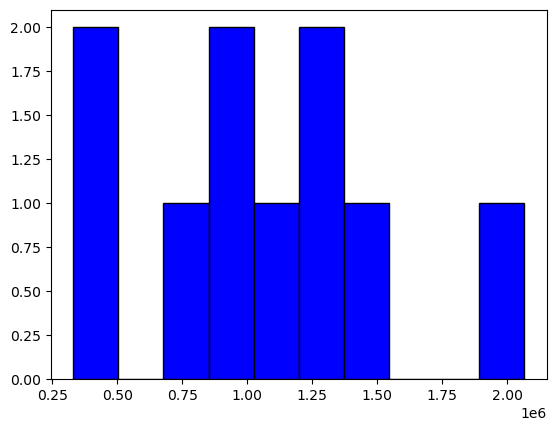

In [63]:
# Resolver acá

import matplotlib.pyplot as plt

df = pd.DataFrame(precios, columns=['Precio'])
plt.hist(df['Precio'], bins=10, color='blue', edgecolor='black')

#

#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). 

Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [11]:
# Resolver acá
import requests

# Término de búsqueda (ejemplo)
termino_busqueda = "Mascarilla Kerastase"  # Reemplaza con el término de búsqueda deseado

# Paso 1: Buscar el ID del vendedor
url_busqueda = f"https://api.mercadolibre.com/sites/MLA/search?q={termino_busqueda}&limit=1"

response_busqueda = requests.get(url_busqueda)

if response_busqueda.status_code == 200:
    # Parsear la respuesta en formato JSON
    data_busqueda = response_busqueda.json()
    
    # Obtener el primer producto en los resultados
    if data_busqueda['results']:
        primer_producto = data_busqueda['results'][0]
        vendedor_id = primer_producto['seller']['id']
        
        print(f"ID del vendedor encontrado: {vendedor_id}")

        # Paso 2: Obtener los productos del vendedor
        url_productos = f"https://api.mercadolibre.com/sites/MLA/search?seller_id={vendedor_id}&limit=50"

        response_productos = requests.get(url_productos)

        if response_productos.status_code == 200:
            # Parsear la respuesta en formato JSON
            data_productos = response_productos.json()
            
            # Obtener la lista de productos
            productos = data_productos['results']
            
            # Mostrar información sobre los primeros productos
            for producto in productos[:5]:  # Solo mostramos los primeros 5 productos
                print(f"Nombre: {producto['title']}")
                print(f"Precio: ${producto['price']}")
                print(f"Acepta Mercado Pago: {'Sí' if producto['accepts_mercadopago'] else 'No'}")
                print(f"Link: {producto['permalink']}\n")
        else:
            print("Error al realizar la consulta a la API para obtener productos del vendedor. Estado:", response_productos.status_code)
    else:
        print("No se encontraron productos para el término de búsqueda proporcionado.")
else:
    print("Error al realizar la consulta a la API para buscar el vendedor. Estado:", response_busqueda.status_code)

ID del vendedor encontrado: 608885756
Nombre: Elvive Sérum  Nutrición  100 Ml
Precio: $12224
Acepta Mercado Pago: Sí
Link: https://www.mercadolibre.com.ar/elvive-serum-nutricion-100-ml/p/MLA17378222#wid=MLA1106024561&sid=unknown

Nombre: Kit Elvive Glycolic Gloss Rutina Brillo Intenso
Precio: $18499
Acepta Mercado Pago: Sí
Link: https://www.mercadolibre.com.ar/kit-elvive-glycolic-gloss-rutina-brillo-intenso/p/MLA39189184#wid=MLA1442043061&sid=unknown

Nombre: Nivea Sun Control Anti Brillo Sin Color Protector Solar Facial 50 Fps 50ml
Precio: $13392.86
Acepta Mercado Pago: Sí
Link: https://www.mercadolibre.com.ar/nivea-sun-control-anti-brillo-sin-color-protector-solar-facial-50-fps-50ml/p/MLA16189493#wid=MLA1212029383&sid=unknown

Nombre: Nautica Voyage Edt 100 Ml Para Hombre
Precio: $41400
Acepta Mercado Pago: Sí
Link: https://www.mercadolibre.com.ar/nautica-voyage-edt-100-ml-para-hombre/p/MLA8729164#wid=MLA1516094138&sid=unknown

Nombre: Sérum Anti-imperfecciones Con Ácido Salicílico D

### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.


In [34]:
# Resolver acá

import requests #html requestor
from bs4 import BeautifulSoup #html parser
import pandas as pd #dataframe manipulator

# URL de la página principal de La Nación
url = 'https://www.lanacion.com.ar/'

# Realizar la solicitud a la página para obtener el contenido de la página web y lo guarda en response
contenido = requests.get(url)

# Crear el objeto BeautifulSoup para analizar el contenido de la página
soup = BeautifulSoup(contenido.text, 'html.parser')

# Categorías de noticias a filtrar
categorias = ['economia', 'politica', 'deportes', 'sociedad', 'cultura', 'espectáculos', 'el-mundo', 'opinión', 'lifestyle']

# Encontrar todos los enlaces en la portada
links = []
for link in soup.find_all('a', href=True):
    href = link['href']
    if href.startswith('/'):
        # Si el link no tiene el dominio, concatenarlo
        full_link = 'https://www.lanacion.com.ar' + href
    elif href.startswith('http'):
        full_link = href
    else:
        continue  # Si el enlace no es válido, lo ignoramos

    # Filtrar solo los enlaces que contienen alguna de las categorías deseadas
    if any(categoria in full_link for categoria in categorias) and not any(excluded in full_link for excluded in ['clima', 'cartelera', 'servicios']):
        links.append(full_link)

# Crear un dataframe con los links
df = pd.DataFrame(links, columns=['Links'])

# Guardar el dataframe en un archivo Excel
df.to_excel('links_lanacion.xlsx', index=False)

print("Archivo Excel creado con éxito.")
print(df)

Archivo Excel creado con éxito.
                                                Links
0               https://www.lanacion.com.ar/politica/
1               https://www.lanacion.com.ar/economia/
2         https://www.lanacion.com.ar/economia/campo/
3   https://www.lanacion.com.ar/economia/comercio-...
4        https://www.lanacion.com.ar/economia/indices
..                                                ...
86              https://www.lanacion.com.ar/economia/
87              https://www.lanacion.com.ar/el-mundo/
88              https://www.lanacion.com.ar/sociedad/
89              https://www.lanacion.com.ar/deportes/
90             https://www.lanacion.com.ar/lifestyle/

[91 rows x 1 columns]
